In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
group = torch.tensor([[1,101],[5,89],[108,5],[115,8]])
labels = torch.tensor([0,0,1,1])    # 0表示爱情片，1表示动作片
group, labels

(tensor([[  1, 101],
         [  5,  89],
         [108,   5],
         [115,   8]]), tensor([0, 0, 1, 1]))

In [3]:
# 相减    # 在这里我的tensor([1,1])，就相当于测试数据
diff_data = group - torch.tensor([1,1])
diff_data

tensor([[  0, 100],
        [  4,  88],
        [107,   4],
        [114,   7]])

In [4]:
# 平方 
diff_data = diff_data**2
diff_data

tensor([[    0, 10000],
        [   16,  7744],
        [11449,    16],
        [12996,    49]])

In [5]:
# 列于列相加
diff_data = diff_data.sum_to_size(4,1)
diff_data

tensor([[10000],
        [ 7760],
        [11465],
        [13045]])

In [6]:
# 开方
diff_data = diff_data**0.5
diff_data

tensor([[100.0000],
        [ 88.0909],
        [107.0747],
        [114.2147]])

In [7]:
# 从小到大进行排序
sort, index = torch.sort(diff_data, dim = 0, descending = False)    # 对于二维数据，dim = 0则是按行排序, dim = 1按列排序
sort, index

(tensor([[ 88.0909],
         [100.0000],
         [107.0747],
         [114.2147]]), tensor([[1],
         [0],
         [2],
         [3]]))

In [8]:
# 现在是我没有办法用torch得到张量中的每个数在全部元素中占第几
# 例如tensor([4,3,5,1]),可以得到tensor([1,3,4,5]),但是得不到[2,1,3,0]
# 下面就要解决这个问题

In [9]:
diff_data = diff_data.reshape(1,4)

In [10]:
diff_data = np.array(diff_data)
diff_data

array([[100.     ,  88.09086, 107.07474, 114.21471]], dtype=float32)

In [11]:
diff_data_indices = diff_data.argsort()
diff_data_indices

array([[1, 0, 2, 3]], dtype=int64)

In [12]:
diff_data_indices = diff_data_indices.flatten()   # 数据从多维结构降到一维，只是维度的变化，数据的量并不变化
diff_data_indices

array([1, 0, 2, 3], dtype=int64)

In [13]:
labels = np.array(labels)
labels

array([0, 0, 1, 1], dtype=int64)

In [14]:
# 定义一个记录类别次数的字典
classCount = {}
for i in range(3):
    get_label = labels[diff_data_indices[i]]
    if get_label not in classCount.keys():
        classCount[get_label] = 0
    classCount[get_label] += 1
classCount 

{0: 2, 1: 1}

In [15]:
classCount_order = sorted(classCount.items(),key=lambda x:x[1], reverse=True)
classCount_order

[(0, 2), (1, 1)]

In [16]:
classCount_order[0][0]

0

In [17]:
# 写成一个函数
# 传进来参数为：待测试的数据，配套的数据集加标签，选取前k个标签进行筛选
# 返回参数为：对于待测试数据预测的一个标签
# 先减，在平方，在相加，在开方，在进行下面的一系列操作
def predicted_label(test, train, labels, k):    # tensor tensor list int
    diff = train - test
    diff = diff**2
    diff = diff.sum_to_size(len(diff), 1)
    diff = diff**0.5
    diff = np.array(diff).reshape(-1)
    diff_indices = diff.argsort()
    dir_label = {}
    for i in range(k):
        get_label = labels[diff_indices[i]]
        if get_label not in dir_label.keys():
            dir_label[get_label] = 0
        dir_label[get_label] += 1
    dir_label_order = sorted(dir_label.items(), key = lambda x:x[1], reverse = True)
    return dir_label_order[0][0]

In [18]:
train = torch.tensor([[1,101],[5,89],[108,5],[115,8]])
labels = [0,0,1,1]
test = torch.tensor([100,20])
k = 3
ans = predicted_label(test, train, labels, k)
ans

1

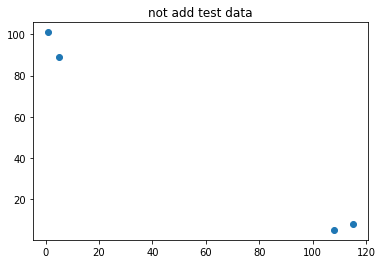

In [19]:
# 画图验证是否正确
plt.scatter(train[:,0], train[:,1], marker='o')
plt.title('not add test data')
plt.show()

In [20]:
train_list = train.tolist()
test_list = test.tolist()
train_list.append(test_list)
train_np = np.array(train_list)

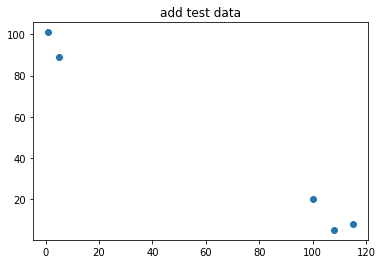

In [21]:
plt.scatter(train_np[:,0], train_np[:,1], marker='o')
plt.title('add test data')
plt.show()